In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import urllib.request
import tarfile
import glob
from tensorflow.keras import layers,datasets,models 

In [2]:
#载入数据
(train_x,train_y),(test_x,test_y)=datasets.cifar100.load_data()


In [3]:
#显示数据集信息
print('training data shape:',train_x.shape)
print('training labels shape:',train_y.shape)
print('test data shape:',test_x.shape)
print('test label shape:',test_y.shape)

training data shape: (50000, 32, 32, 3)
training labels shape: (50000, 1)
test data shape: (10000, 32, 32, 3)
test label shape: (10000, 1)


In [4]:
train_x=train_x[0:2000,:,:,:]
train_y=train_y[0:2000,:]
test_x=test_x[-500:,:,:,:]
test_y=test_y[-500:,:]


In [5]:
print('training data shape:',train_x.shape)
print('training labels shape:',train_y.shape)
print('test data shape:',test_x.shape)
print('test label shape:',test_y.shape)

training data shape: (2000, 32, 32, 3)
training labels shape: (2000, 1)
test data shape: (500, 32, 32, 3)
test label shape: (500, 1)


In [ ]:
#查看单项image和label
#查看Xtrain第7张image
plt.imshow(train_x[6])

In [ ]:
#查看label
#对应类别信息可查看：https://www.cs.toronto.edu/~kriz/cifar.html
train_y[6]


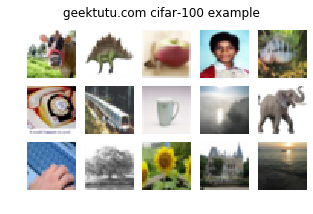

In [12]:
plt.figure(figsize=(5,3))
plt.subplots_adjust(hspace=0.1)
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(train_x[i])
    plt.axis('off')
_ = plt.suptitle("geektutu.com cifar-100 example")

In [ ]:
#数据预处理
#查看图像信息，显示第一个图像的第一个像素点
train_x[0][0][0]

In [6]:
train_x=tf.image.resize(train_x,[128,128])#将图像规整到ResNet网络要求的输入尺寸
#将图像进行数字标准化
train_x=tf.cast(train_x,tf.float32)
train_x=train_x/255

In [7]:
test_x=tf.image.resize(test_x,[128,128])
#将图像进行数字标准化
test_x=tf.cast(test_x,tf.float32)
test_x=test_x/255

In [8]:
#查看预处理后的图像数据信息
train_x.shape

TensorShape([2000, 128, 128, 3])

In [ ]:
test_x.shape

In [9]:
train_x[0][0][0]

<tf.Tensor: id=23, shape=(3,), dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>

In [ ]:
#查看标签数据
train_y[:10]

In [10]:
train_y.shape

(2000, 1)

In [11]:
covn_base=tf.keras.applications.ResNet50(weights='imagenet',
                                                   include_top=False,
                                                   input_shape=(128,128,3),                                    
                                                   pooling='max')
covn_base.trainable=False

In [12]:
covn_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 64, 64, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [13]:
model=tf.keras.Sequential()
model.add(covn_base)
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6500      
Total params: 23,864,740
Trainable params: 277,028
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history=model.fit(train_x,train_y,epochs=5)

Epoch 1/5
2000/2000 [==============================] - 166s 83ms/sample - loss: 4.7816 - acc: 0.0150
Epoch 2/5
2000/2000 [==============================] - 160s 80ms/sample - loss: 4.3074 - acc: 0.0560
Epoch 3/5
2000/2000 [==============================] - 162s 81ms/sample - loss: 3.8028 - acc: 0.1280
Epoch 4/5
2000/2000 [==============================] - 161s 80ms/sample - loss: 3.1905 - acc: 0.2340
Epoch 5/5
2000/2000 [==============================] - 170s 85ms/sample - loss: 2.6674 - acc: 0.3250


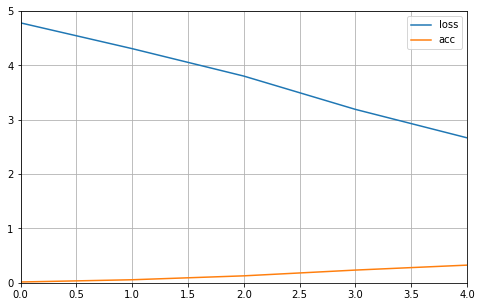

In [17]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,5)
    plt.show()
    
plot_learning_curves(history)

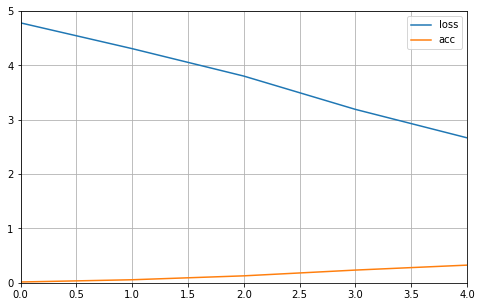

In [18]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,5)
    plt.show()
    
plot_learning_curves(history)

In [19]:
model.evaluate(test_x,test_y)

500/500 [==============================] - 15s 29ms/sample - loss: 18.0008 - acc: 0.0200


[18.00076968383789, 0.02]